Attribute Information:

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

In [1]:
#Those are libraries that I used
import sys
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Visualization libraries
from matplotlib import pyplot as plt
import seaborn

# For manupulating the data
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder

# Models under the Sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

# to calculate the performances of the models 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score # score evaluation
from sklearn.model_selection import cross_val_predict # prediction

In [2]:
# Loading the data into the notebook
# With respect to kaggle working directory the data in 'mushroom-classification' folder
mush = pd.read_csv('../input/mushroom-classification/mushrooms.csv')
mush.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [3]:
# Data types of attributes
mush.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [4]:
# Quick overlook to the data
mush.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
# checking the is there any 'na' data points in the data 
mush.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

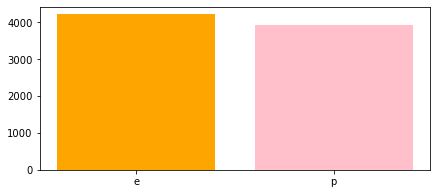

In [6]:
# Plotting the number of classes as in bar plot
plt.figure(figsize=(7, 3))
plt.bar(mush['class'].value_counts().index, mush['class'].value_counts().values,color=['orange','pink'])
plt.show()

In [7]:
# To do manipulation on data we need to copy of data
df = mush.copy()
# Data has ordinal attributes, The LabelEncoder has been used to make into numerical values  
Lb = LabelEncoder()
# iterating the encoding all the attributes
for features in df.columns:
    df[features] = Lb.fit_transform(df[features])
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


<AxesSubplot:xlabel='class'>

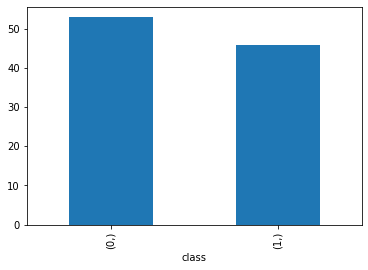

In [8]:
# 
df[-100:-1][['class']].value_counts().plot(kind='bar')

In [9]:
# Training varaibles
X = df.drop(columns=['class'],axis=1)[:-100]
# Training classes
Y = df['class'][:-100]
# Testing variables with 100 samples
x = df.drop(columns=['class'], axis=1)[-100:]
# Testing classe with 100 samples
y = df['class'][-100:] 

In [10]:
# As in needed my task I have to apply 2-Fold cross validation
kfold = KFold(n_splits=2, random_state=42, shuffle=True)
train_scores = []
for i in range(2,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    cv_result = cross_val_score(knn,X,Y,cv=kfold, scoring="accuracy")
    train_scores.append(cv_result.mean())
knn_models_performances = pd.DataFrame({'Mean_training_scores':train_scores},index=range(2,11))       

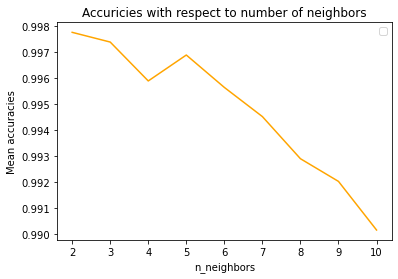

In [11]:
plt.plot(knn_models_performances.Mean_training_scores,color='orange')
plt.ylabel('Mean accuracies')
plt.xlabel('n_neighbors')
plt.title('Accuricies with respect to number of neighbors')
plt.legend()
plt.show()

In [12]:
# After the getting the results the accurcy has the best result on 2 neighbors
knn = KNeighborsClassifier(n_neighbors=2)
training_score = []
testing_score = []

# For training the KNN on 2 neighbors
for train_index, test_index in kfold.split(X):
#     print(train_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    knn.fit(X_train,Y_train)
    training_score.append(knn.score(X,Y))
    train_predictions = knn.predict(X_test)
    testing_score.append(accuracy_score(Y_test, train_predictions))

In [13]:
# Results scores
print("training_score{training_score}".format(training_score=training_score))
print("testing_score{testing_score}".format(testing_score=testing_score))

training_score[0.9982552342971087, 0.9992522432701895]
testing_score[0.9970089730807578, 0.9985044865403788]


<AxesSubplot:>

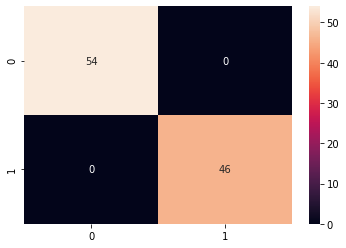

In [14]:
# Validation part of KNN
val_predictions = knn.predict(x)
cm = confusion_matrix(y, val_predictions)
seaborn.heatmap(cm, annot=True)

In [15]:
# Validation scores with using 'classification_report'
print(classification_report(y,val_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        46

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


[[3967  187]
 [2170 1700]]


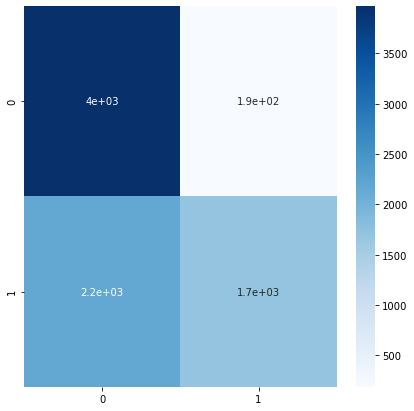

In [16]:
# Due to kmeans is a unsupervised learning algorithm no need to split the data into folds
# Just feeding with training attributes
# Aim is classification so clustering number is choosed as 2, n_init is choosed randomly, n_jobs is choosed -1 for using all cpus
kmeans = KMeans(2,init='k-means++',n_init=100,n_jobs=-1)
# training the kmeans
kmeans.fit(X)

# Getting the labels which are trained on the data and training classes into the confusion matrix
cm_1 = confusion_matrix(Y,kmeans.labels_)

# Printing and plotting the results to better see
print(cm_1)
plt.figure(figsize=(7,7))
seaborn.heatmap(cm_1,annot=True, cmap='Blues')
plt.show()

In [17]:
# Classification report of training
print(classification_report(Y,kmeans.labels_))

              precision    recall  f1-score   support

           0       0.65      0.95      0.77      4154
           1       0.90      0.44      0.59      3870

    accuracy                           0.71      8024
   macro avg       0.77      0.70      0.68      8024
weighted avg       0.77      0.71      0.68      8024



[[49  5]
 [ 2 44]]


<AxesSubplot:>

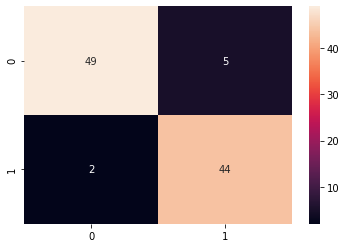

In [18]:
# Validation part
val_preds = kmeans.predict(x)
cm_2 = confusion_matrix(y,val_preds)
print(cm_2)

seaborn.heatmap(cm_2,annot=True)

In [19]:
# Validation results
print(classification_report(y,val_preds))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93        54
           1       0.90      0.96      0.93        46

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100

